In [618]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
import numpy as np
%matplotlib inline

### Read scraped movie data into a pandas DataFrame

In [619]:
lb_df = pd.read_csv("Letterboxd.csv")

lb_df.head(3)

,Unnamed: 0,Year,Director,Desc.,Runtime,Cast,Watched,Lists,Liked,0.5,...,3,3.5,4,4.5,5,Average Rating,Total Rated,Genres,Themes,Premiere Date
0,Barbie,2023.0,Greta Gerwig,Barbie and Ken are having the time of their li...,114.0,"Margot Robbie, Ryan Gosling, America Ferrera, ...",3M,390K,1.3M,9788.0,...,288810.0,325457.0,682566.0,316056.0,690969.0,4.011,2486939.0,"Comedy, Fantasy, Adventure","Relationship comedy, Song and dance, Crude hum...",09 Jul 2023
1,Parasite,2019.0,Bong Joon-ho,"All unemployed, Ki-taek's family takes peculia...",133.0,"Song Kang-ho, Lee Sun-kyun, Cho Yeo-jeong, Cho...",3.4M,486K,2M,2270.0,...,80610.0,94836.0,508691.0,430357.0,1393803.0,4.555,2542023.0,"Comedy, Thriller, Drama","Intense violence and sexual transgression, Mov...",21 May 2019
2,Everything Everywhere All at Once,2022.0,Daniel Scheinert,An aging Chinese immigrant is swept up in an i...,140.0,"Michelle Yeoh, Stephanie Hsu, Ke Huy Quan, Jam...",2.6M,456K,1.3M,8470.0,...,121375.0,129423.0,389416.0,322424.0,1008809.0,4.363,2077462.0,"Science Fiction, Action, Adventure","Relationship comedy, Epic heroes, Intense comb...",11 Mar 2022


In [620]:
lb_df.shape
# has 1912 movies, 24 variables

(1912, 24)

### Data cleaning/manipulation
- Convert types
- Find possible missing values


In [621]:
lb_df.dtypes

Unnamed: 0         object
Year              float64
Director           object
Desc.              object
Runtime           float64
Cast               object
Watched            object
Lists              object
Liked              object
0.5               float64
1                 float64
1.5               float64
2                 float64
2.5               float64
3                 float64
3.5               float64
4                 float64
4.5               float64
5                 float64
Average Rating    float64
Total Rated       float64
Genres             object
Themes             object
Premiere Date      object
dtype: object

In [622]:
lb_df = lb_df.rename(columns= {"Unnamed: 0": "Title"})

In [623]:
lb_df[lb_df.isna().any(axis=1)]
# the only NaN row is at index 147

,Title,Year,Director,Desc.,Runtime,Cast,Watched,Lists,Liked,0.5,...,3,3.5,4,4.5,5,Average Rating,Total Rated,Genres,Themes,Premiere Date
147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [624]:
lb_df = lb_df.dropna(how="all")
# The dataframe now has length 1911, only one row was dropped.
lb_df.shape

(1911, 24)

In [625]:
# Let's test again whether there are any missing values
lb_df[lb_df.isna().any(axis=1)]

,Title,Year,Director,Desc.,Runtime,Cast,Watched,Lists,Liked,0.5,...,3,3.5,4,4.5,5,Average Rating,Total Rated,Genres,Themes,Premiere Date


In [626]:
lb_df[["0.5","1", "1.5", "2", "2.5", "3", "3.5", "4", "4.5", "5", "Runtime", "Year", "Total Rated"]] \
    = lb_df[["0.5","1", "1.5", "2", "2.5", "3", "3.5", "4", "4.5", "5", "Runtime", "Year", "Total Rated"]].astype(int)
lb_df.head()

,Title,Year,Director,Desc.,Runtime,Cast,Watched,Lists,Liked,0.5,...,3,3.5,4,4.5,5,Average Rating,Total Rated,Genres,Themes,Premiere Date
0,Barbie,2023,Greta Gerwig,Barbie and Ken are having the time of their li...,114,"Margot Robbie, Ryan Gosling, America Ferrera, ...",3M,390K,1.3M,9788,...,288810,325457,682566,316056,690969,4.011,2486939,"Comedy, Fantasy, Adventure","Relationship comedy, Song and dance, Crude hum...",09 Jul 2023
1,Parasite,2019,Bong Joon-ho,"All unemployed, Ki-taek's family takes peculia...",133,"Song Kang-ho, Lee Sun-kyun, Cho Yeo-jeong, Cho...",3.4M,486K,2M,2270,...,80610,94836,508691,430357,1393803,4.555,2542023,"Comedy, Thriller, Drama","Intense violence and sexual transgression, Mov...",21 May 2019
2,Everything Everywhere All at Once,2022,Daniel Scheinert,An aging Chinese immigrant is swept up in an i...,140,"Michelle Yeoh, Stephanie Hsu, Ke Huy Quan, Jam...",2.6M,456K,1.3M,8470,...,121375,129423,389416,322424,1008809,4.363,2077462,"Science Fiction, Action, Adventure","Relationship comedy, Epic heroes, Intense comb...",11 Mar 2022
3,Fight Club,1999,David Fincher,A ticking-time-bomb insomniac and a slippery s...,139,"Edward Norton, Brad Pitt, Helena Bonham Carter...",3.3M,379K,1.5M,3096,...,151007,161694,621373,364705,865776,4.306,2230031,Drama,"Intense violence and sexual transgression, Pol...",10 Sep 1999
4,Interstellar,2014,Christopher Nolan,The adventures of a group of explorers who mak...,169,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",3.1M,398K,1.4M,3755,...,143190,139999,458472,307422,974730,4.360,2101383,"Science Fiction, Drama, Adventure","Monsters, aliens, sci-fi and the apocalypse, I...",26 Oct 2014


In [627]:
lb_df.dtypes

Title              object
Year                int64
Director           object
Desc.              object
Runtime             int64
Cast               object
Watched            object
Lists              object
Liked              object
0.5                 int64
1                   int64
1.5                 int64
2                   int64
2.5                 int64
3                   int64
3.5                 int64
4                   int64
4.5                 int64
5                   int64
Average Rating    float64
Total Rated         int64
Genres             object
Themes             object
Premiere Date      object
dtype: object

#### The "Watched", "Lists", and "Liked" columns need to be converted to integers.

In [628]:
def num_conversion(num):
    if num.strip()[-1].lower() == "m":
        return int(float(num.strip()[:-1]) * 1e6)  # Millions
    elif num.strip()[-1].lower() == "k":
        return int(float(num.strip()[:-1]) * 1e3)  # Thousands
    else:
        return int(num.strip()[:-1])  # Other

watched = lb_df["Watched"].apply(num_conversion)
lists = lb_df["Lists"].apply(num_conversion)
liked = lb_df["Liked"].apply(num_conversion)
lb_df["Watched"] = watched
lb_df["Lists"] = lists
lb_df["Liked"] = liked
lb_df.head()

,Title,Year,Director,Desc.,Runtime,Cast,Watched,Lists,Liked,0.5,...,3,3.5,4,4.5,5,Average Rating,Total Rated,Genres,Themes,Premiere Date
0,Barbie,2023,Greta Gerwig,Barbie and Ken are having the time of their li...,114,"Margot Robbie, Ryan Gosling, America Ferrera, ...",3000000,390000,1300000,9788,...,288810,325457,682566,316056,690969,4.011,2486939,"Comedy, Fantasy, Adventure","Relationship comedy, Song and dance, Crude hum...",09 Jul 2023
1,Parasite,2019,Bong Joon-ho,"All unemployed, Ki-taek's family takes peculia...",133,"Song Kang-ho, Lee Sun-kyun, Cho Yeo-jeong, Cho...",3400000,486000,2000000,2270,...,80610,94836,508691,430357,1393803,4.555,2542023,"Comedy, Thriller, Drama","Intense violence and sexual transgression, Mov...",21 May 2019
2,Everything Everywhere All at Once,2022,Daniel Scheinert,An aging Chinese immigrant is swept up in an i...,140,"Michelle Yeoh, Stephanie Hsu, Ke Huy Quan, Jam...",2600000,456000,1300000,8470,...,121375,129423,389416,322424,1008809,4.363,2077462,"Science Fiction, Action, Adventure","Relationship comedy, Epic heroes, Intense comb...",11 Mar 2022
3,Fight Club,1999,David Fincher,A ticking-time-bomb insomniac and a slippery s...,139,"Edward Norton, Brad Pitt, Helena Bonham Carter...",3300000,379000,1500000,3096,...,151007,161694,621373,364705,865776,4.306,2230031,Drama,"Intense violence and sexual transgression, Pol...",10 Sep 1999
4,Interstellar,2014,Christopher Nolan,The adventures of a group of explorers who mak...,169,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",3100000,398000,1400000,3755,...,143190,139999,458472,307422,974730,4.360,2101383,"Science Fiction, Drama, Adventure","Monsters, aliens, sci-fi and the apocalypse, I...",26 Oct 2014


#### Separate the Premiere Date into Day and Month Column, the Year is already included

In [629]:
day = [date.split(" ")[0] for date in lb_df["Premiere Date"]]
month = [m.split(" ")[1] for m in lb_df["Premiere Date"]]
lb_df["prem_day"] = day
lb_df["prem_month"] = month

In [630]:
lb_df.head()

,Title,Year,Director,Desc.,Runtime,Cast,Watched,Lists,Liked,0.5,...,4,4.5,5,Average Rating,Total Rated,Genres,Themes,Premiere Date,prem_day,prem_month
0,Barbie,2023,Greta Gerwig,Barbie and Ken are having the time of their li...,114,"Margot Robbie, Ryan Gosling, America Ferrera, ...",3000000,390000,1300000,9788,...,682566,316056,690969,4.011,2486939,"Comedy, Fantasy, Adventure","Relationship comedy, Song and dance, Crude hum...",09 Jul 2023,09,Jul
1,Parasite,2019,Bong Joon-ho,"All unemployed, Ki-taek's family takes peculia...",133,"Song Kang-ho, Lee Sun-kyun, Cho Yeo-jeong, Cho...",3400000,486000,2000000,2270,...,508691,430357,1393803,4.555,2542023,"Comedy, Thriller, Drama","Intense violence and sexual transgression, Mov...",21 May 2019,21,May
2,Everything Everywhere All at Once,2022,Daniel Scheinert,An aging Chinese immigrant is swept up in an i...,140,"Michelle Yeoh, Stephanie Hsu, Ke Huy Quan, Jam...",2600000,456000,1300000,8470,...,389416,322424,1008809,4.363,2077462,"Science Fiction, Action, Adventure","Relationship comedy, Epic heroes, Intense comb...",11 Mar 2022,11,Mar
3,Fight Club,1999,David Fincher,A ticking-time-bomb insomniac and a slippery s...,139,"Edward Norton, Brad Pitt, Helena Bonham Carter...",3300000,379000,1500000,3096,...,621373,364705,865776,4.306,2230031,Drama,"Intense violence and sexual transgression, Pol...",10 Sep 1999,10,Sep
4,Interstellar,2014,Christopher Nolan,The adventures of a group of explorers who mak...,169,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",3100000,398000,1400000,3755,...,458472,307422,974730,4.360,2101383,"Science Fiction, Drama, Adventure","Monsters, aliens, sci-fi and the apocalypse, I...",26 Oct 2014,26,Oct


#### Extract the top genre listed so that the movies are groupable by genre

In [631]:
topGenre = [g.strip().split(",")[0] for g in lb_df.Genres]
lb_df["top_genre"] = topGenre
lb_df.head(2)

,Title,Year,Director,Desc.,Runtime,Cast,Watched,Lists,Liked,0.5,...,4.5,5,Average Rating,Total Rated,Genres,Themes,Premiere Date,prem_day,prem_month,top_genre
0,Barbie,2023,Greta Gerwig,Barbie and Ken are having the time of their li...,114,"Margot Robbie, Ryan Gosling, America Ferrera, ...",3000000,390000,1300000,9788,...,316056,690969,4.011,2486939,"Comedy, Fantasy, Adventure","Relationship comedy, Song and dance, Crude hum...",09 Jul 2023,09,Jul,Comedy
1,Parasite,2019,Bong Joon-ho,"All unemployed, Ki-taek's family takes peculia...",133,"Song Kang-ho, Lee Sun-kyun, Cho Yeo-jeong, Cho...",3400000,486000,2000000,2270,...,430357,1393803,4.555,2542023,"Comedy, Thriller, Drama","Intense violence and sexual transgression, Mov...",21 May 2019,21,May,Comedy


### Data Analysis: Questions to Investigate
- Which Genres are represented the most among the most popular on Letterboxd?
- How do the average ratings differ accross these genres?
- How have average ratings changed over time?
- What does the distribution of runtimes look like?



### Genre Counts in the top Movies
- Drama is by far the most abundant genre, followed by Comedy

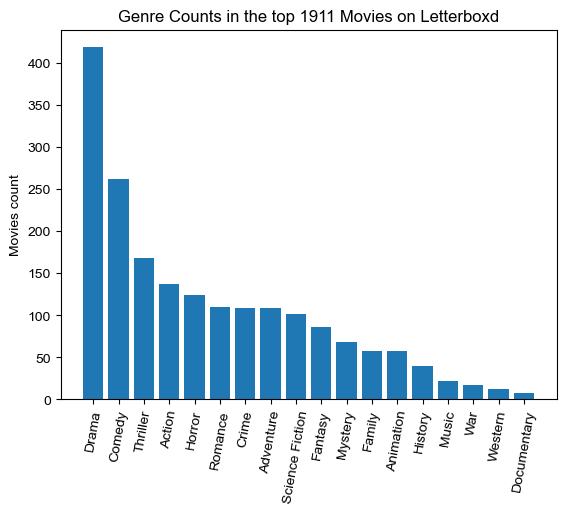

In [632]:
genres_counts = lb_df.top_genre.value_counts().reset_index()
plt.bar(genres_counts["top_genre"], genres_counts["count"])
plt.xticks(rotation= 80)
plt.title("Genre Counts in the top 1911 Movies on Letterboxd")
plt.ylabel("Movies count")
pass

### Average Rating by Genre
- There is no major, apparent difference in average rating between genres. 
- Documentaries have the highest rating, on average, but they also had the lowest count. 

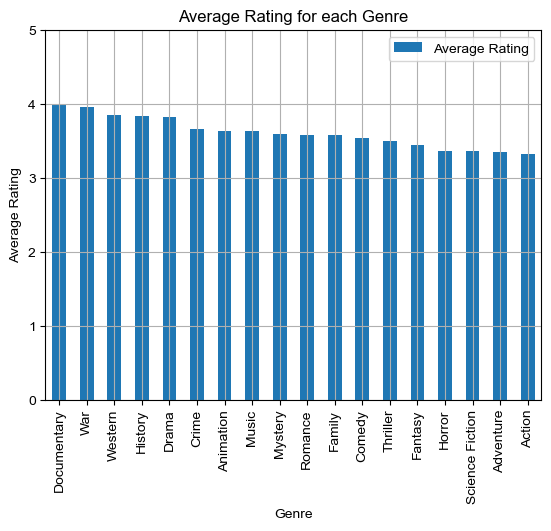

In [633]:
genres_ratings = lb_df[["top_genre", "Average Rating"]].groupby("top_genre").mean().sort_values(by = "Average Rating", ascending = False)
ax = genres_ratings.plot.bar()
ax.set_ylim(top = 5)
ax.grid()
ax.set_title("Average Rating for each Genre")
ax.set_ylabel("Average Rating")
ax.set_xlabel("Genre")
pass

In [634]:

directors_counts = lb_df[["Director"]].value_counts().reset_index()
directors_over3 = list(directors_counts[directors_counts["count"] >= 3].Director)

directors = lb_df[["Director", "Average Rating"]].groupby("Director").mean()
ratings = []
for d in directors_over3:
    ratings.append(directors.loc[d]["Average Rating"])

counts = list(directors_counts[directors_counts["count"] >= 3]["count"])

dir_dict = {"Director": directors_over3,
            "Rating": ratings,
            "Count": counts}

dir_df = pd.DataFrame(dir_dict)

dir_df.head()

,Director,Rating,Count
0,Steven Spielberg,3.684042,24
1,Martin Scorsese,3.921211,19
2,Tim Burton,3.524400,15
3,Ridley Scott,3.580571,14
4,Joel Coen,3.864143,14


### Does a Director's average rating correlate with their count of movies?
- There is no apparent correlation between the number of popular movies a director has and their average rating over these movies.

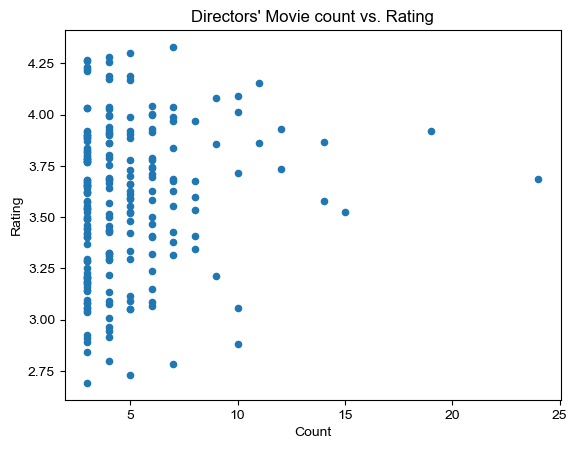

In [635]:
ax = dir_df.plot.scatter("Count","Rating")
ax.set_title("Directors' Movie count vs. Rating")
pass

### Is the Average Rating of each movie related to its number of likes?
- There is a faint relationship, as would be expected, when the x scale is logarithmic.

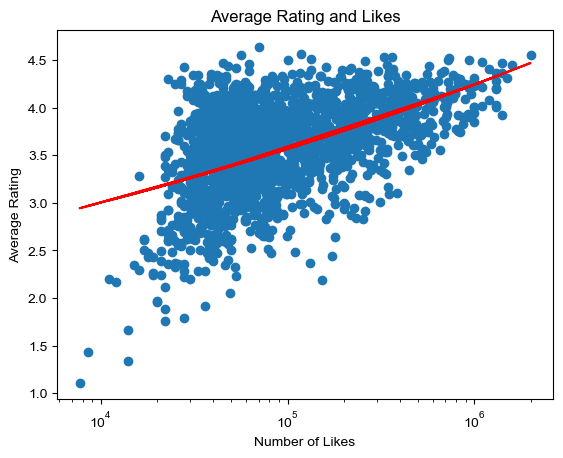

In [649]:
plt.scatter(lb_df["Liked"], lb_df["Average Rating"])
x = np.log10(lb_df["Liked"])
y = np.log10(lb_df["Average Rating"])

m, b = np.polyfit(x, y, deg=1)

reg_line = m*x + b
plt.plot(lb_df["Liked"], np.power(10, reg_line), c="red")
plt.xscale("log")
plt.xlabel("Number of Likes")
plt.ylabel("Average Rating")
plt.title("Average Rating and Likes")
pass

### How has the average rating of all movies in each year changed over time?
- Correlation: r = -0.765
- 58.53 percent of the variation in rating is accounted for by the year
- This is likely due to recency bias, as users are far more likely to both review newer movies, and have more polarizing ratings on newer movies as well.

Correlation: r = -0.765
58.53 percent of the variation in rating is accounted for by the year


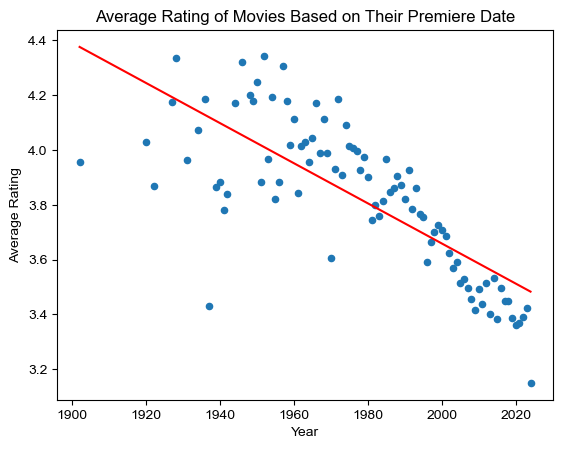

In [637]:
# Construct the movies DataFrame grouped by year with average rating
year_df = lb_df[["Year", "Average Rating"]].groupby("Year").mean().reset_index()
ax = year_df.plot.scatter("Year", "Average Rating")

m, b = np.polyfit(year_df.Year, year_df["Average Rating"], 1)
regline = m * year_df.Year + b
ax.plot(year_df["Year"], regline, c = "red")
ax.set_title("Average Rating of Movies Based on Their Premiere Date")

corr = year_df.corr().iloc[0]["Average Rating"]
print(f"Correlation: r = {round(corr, 4)}\n{round(corr**2, 4) * 100} percent of the variation in rating is accounted for by the year")

### How is the runtime distributed among the most popular movies?
- Weakly skewed right, with a median at 112 minutes

112.0

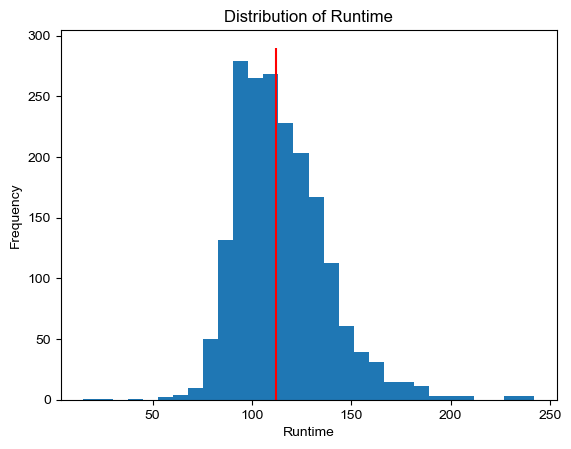

In [638]:
ax = lb_df.Runtime.plot.hist(bins = 30)
ax.set_xlabel("Runtime")
ax.set_title("Distribution of Runtime")
median = lb_df.Runtime.describe().loc["50%"]
ax.vlines(x = median, ymin=0, ymax=290, colors="red")
median

### Genres and Themes
When I scraped the data from Letterboxd, I formatted genres and themes in the DataFrame as a string that listed them, so I'll have to separate the genres and themes strings into separate genres in the order they're listed. I'll then investigate:

- What themes are the most popular?
- What theme is most popular for each genre?
- What theme/genre combinations are most popular?

In [639]:
lb_df[["Genres", "Themes"]]


,Genres,Themes
0,"Comedy, Fantasy, Adventure","Relationship comedy, Song and dance, Crude hum..."
1,"Comedy, Thriller, Drama","Intense violence and sexual transgression, Mov..."
2,"Science Fiction, Action, Adventure","Relationship comedy, Epic heroes, Intense comb..."
3,Drama,"Intense violence and sexual transgression, Pol..."
4,"Science Fiction, Drama, Adventure","Monsters, aliens, sci-fi and the apocalypse, I..."
...,...,...
1907,"Drama, Comedy, Romance","Relationship comedy, Moving relationship stori..."
1908,Drama,"Humanity and the world around us, Moving relat..."
1909,"Drama, Thriller","Faith and religion, Humanity and the world aro..."
1910,"Science Fiction, Adventure, Action","Epic heroes, Monsters, aliens, sci-fi and the ..."


In [640]:
theme_list = lb_df.Themes.apply(str.split, args=(","))

theme_dict = {}
for themes in theme_list:
    for theme in themes:
        if theme not in theme_dict:
            theme_dict[theme] = 0
        theme_dict[theme] +=1

theme_df = pd.DataFrame(theme_dict, index = range(1))
theme_df = theme_df.T.reset_index()
theme_df = theme_df.rename(columns = {"index": "theme", 0:"Count"})

- The most popular themes have to do with sci-fi and horror. This is most likely because of grouping of these themes together on movies that fit into the sci-fi and horror genres, as well as other genres such as action or adventure. 
- So, I am left with the question: What themes are typically listed with which genres?

<Figure size 600x600 with 0 Axes>

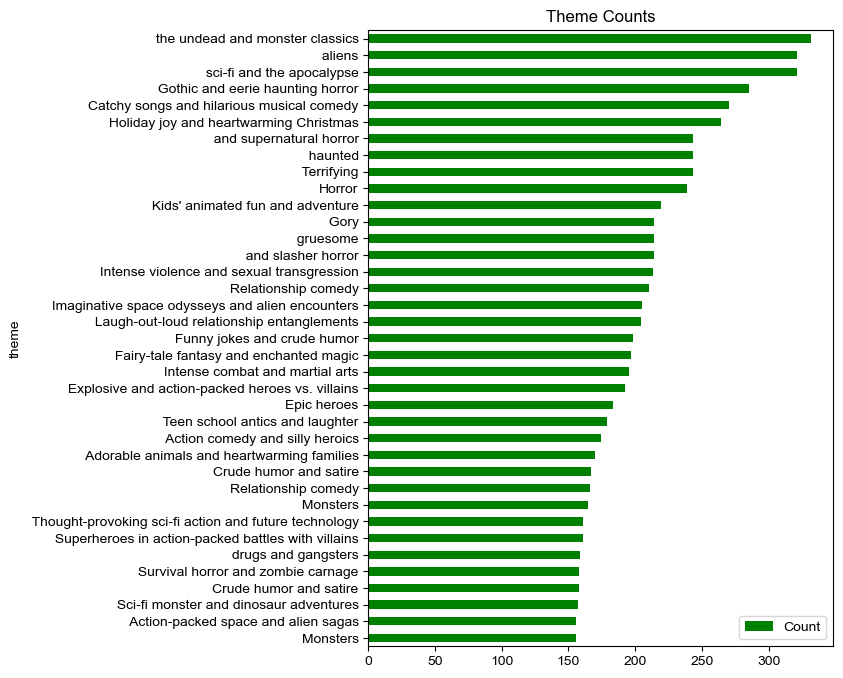

In [646]:
theme_df_filtered = theme_df[theme_df.Count > 155].sort_values(by="Count")

fig = plt.figure(figsize = (6, 6))
ax = theme_df_filtered.plot.barh("theme", "Count", figsize = (6, 8), color="green")
ax.set_title("Theme Counts")
pass

#### Most common genre-theme combinations

In [648]:
g_t_counts = lb_df.groupby(["top_genre","top_theme"]).size().sort_values(ascending=False).reset_index(name='count').drop_duplicates(subset='top_genre')
g_t_counts

,top_genre,top_theme,count
0,Horror,Horror,100
1,Drama,Moving relationship stories,77
2,Comedy,Relationship comedy,71
4,Science Fiction,Monsters,52
6,Action,Epic heroes,50
8,Thriller,Horror,46
9,Adventure,Epic heroes,41
10,Fantasy,Epic heroes,35
12,Romance,Relationship comedy,34
14,Mystery,Horror,29


#### Most popular top and second themes for each top genre

In [643]:


lb_df["second_genre"] = [g.strip().split(",")[1] if len(g.strip().split(",")) > 1 else None for g in lb_df.Genres]
lb_df["top_theme"] = [t.strip().split(",")[0] for t in lb_df.Themes]
lb_df["second_theme"] = [t.strip().split(",")[1] for t in lb_df.Themes]

g2_t_counts = lb_df.groupby(["top_genre","top_theme", "second_theme"]).size().sort_values(ascending=False).reset_index(name='count').drop_duplicates(subset='top_genre')
g2_t_counts

,top_genre,top_theme,second_theme,count
0,Horror,Horror,the undead and monster classics,100
1,Science Fiction,Monsters,aliens,52
2,Thriller,Horror,the undead and monster classics,46
3,Comedy,Crude humor and satire,Relationship comedy,42
5,Mystery,Horror,the undead and monster classics,29
6,Action,Monsters,aliens,27
7,Crime,Crime,drugs and gangsters,26
8,Drama,Moving relationship stories,Relationship comedy,23
17,Adventure,Monsters,aliens,14
22,Fantasy,Epic heroes,Epic history and literature,12


#### Most popular theme counts for all top-2 genre combinations

In [644]:
g2_t_counts = lb_df.groupby(["top_genre","second_genre", "second_theme"]).size().sort_values(ascending=False).reset_index(name='count').drop_duplicates(subset='top_genre')
g2_t_counts

,top_genre,second_genre,second_theme,count
0,Thriller,Horror,the undead and monster classics,33
1,Horror,Thriller,the undead and monster classics,26
2,Drama,Romance,Relationship comedy,17
4,Comedy,Romance,Crude humor and satire,16
5,Action,Science Fiction,aliens,15
6,Mystery,Horror,the undead and monster classics,15
11,Science Fiction,Action,aliens,12
12,Romance,Drama,Moving relationship stories,11
14,Crime,Drama,drugs and gangsters,11
28,Animation,Family,Holiday joy and heartwarming Christmas,8
